In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from google.colab import drive
drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/INTERNSHIP/ICESAT_1.csv'
X = pd.read_csv(csv_path);

print(X.head(20))





In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels = db_default.labels_

colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

In [ ]:
cvec = [colours[label] for label in labels]

In [ ]:
from plotnine import *

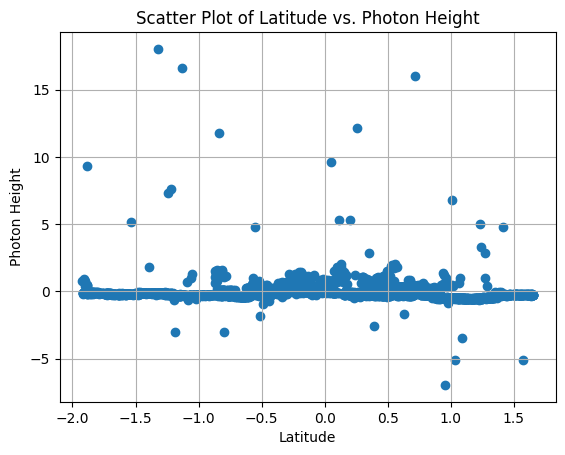

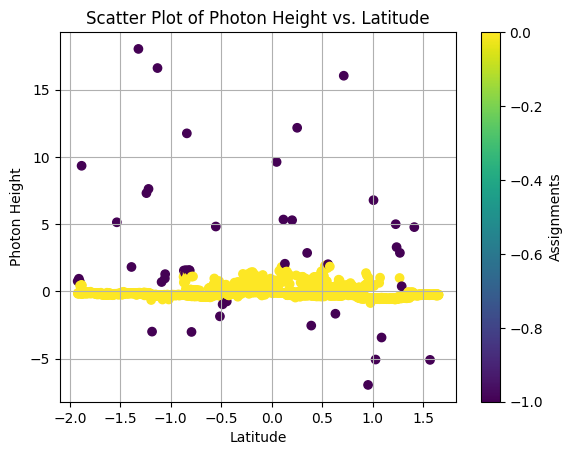

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

##from sklearn.cluster import Kmeans
from sklearn.mixture import GaussianMixture


from google.colab import drive
##drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/INTERNSHIP/ICESAT_1.csv'
d1 = pd.read_csv(csv_path);

#print(d1.head())
# Standardize the features
z = StandardScaler()

d1[["latitude","photon height"]] = z.fit_transform(d1[["latitude","photon height"]])

#ggplot(d1, aes(x = "latitude", y = "photon height")) + geom_point() + theme_minimal()

import matplotlib.pyplot as plt

# Assuming 'd1' is your DataFrame containing the data

plt.scatter(d1['latitude'], d1['photon height'])
plt.xlabel('Latitude')
plt.ylabel('Photon Height')
plt.title('Scatter Plot of Latitude vs. Photon Height')
plt.grid(True)
plt.show()

db1 = DBSCAN(eps = 0.5, min_samples = 25).fit(d1)

labsList = ["Noise"]
labsList = labsList + ["Cluster" + str(i) for i in range(1,len(set(db1.labels_)))]

d1["assignments"] = db1.labels_

#ggplot(d1, aes(x = "photon height", y = "latitude", color = "assignments")) + geom_point() + theme_minimal()

plt.scatter(d1['latitude'], d1['photon height'], c=d1['assignments'])
plt.ylabel('Photon Height')
plt.xlabel('Latitude')
plt.title('Scatter Plot of Photon Height vs. Latitude')
plt.grid(True)
plt.colorbar(label='Assignments')
plt.show()


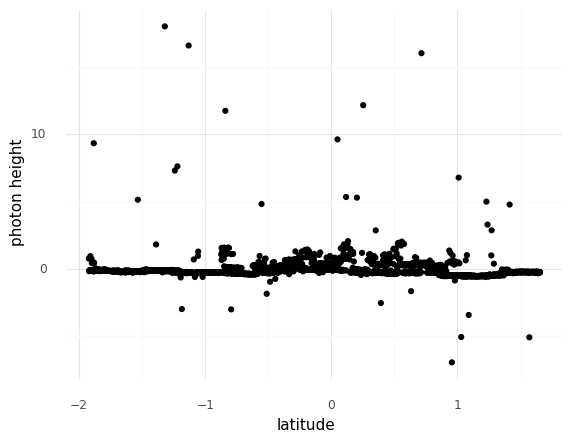

<ggplot: (8739716233382)>

In [ ]:
ggplot(d1, aes(x = "latitude", y = "photon height")) + geom_point() + theme_minimal()

Mounted at /content/drive
   photon height   latitude
0      398.14233  27.228242
1      391.40497  27.228248
2      391.65402  27.228248
3      391.85645  27.228248
4      391.81010  27.228254
   photon height  latitude
0       0.762227 -1.922833
1      -0.178431 -1.919921
2      -0.143659 -1.919919
3      -0.115396 -1.919918
4      -0.121867 -1.916966


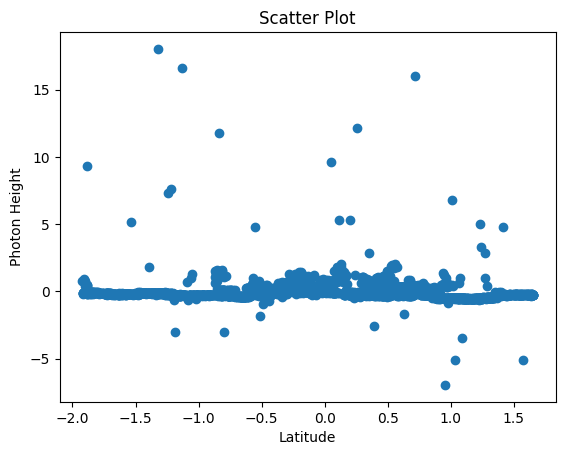

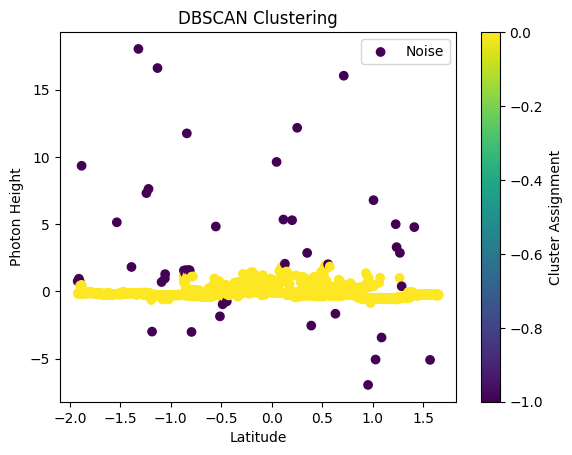

AttributeError: ignored

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture


from google.colab import drive
drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/INTERNSHIP/ICESAT_1.csv'
d1 = pd.read_csv(csv_path);
req_col = [ "photon height", "latitude"]
print(d1[req_col].head())

# Standardize the features
z = StandardScaler()
d1[["photon height","latitude"]] = z.fit_transform(d1[["photon height","latitude"]])
print(d1[["photon height","latitude"]].head())

plt.scatter(d1["latitude"], d1["photon height"])
plt.ylabel("Photon Height")
plt.xlabel("Latitude")
plt.title("Scatter Plot")
plt.show()

# DBSCAN and plots
db1 = DBSCAN(eps=0.5, min_samples=25).fit(d1)
labsList = ["Noise"] + ["Cluster" + str(i) for i in range(1, len(set(db1.labels_)))]

plt.scatter(d1["latitude"], d1["photon height"], c=db1.labels_)
plt.ylabel("Photon Height")
plt.xlabel("Latitude")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster Assignment")
plt.legend(labsList)
plt.show()


#cluster data points
d1_clustered = d1.loc[(d1.assignments >= 0)]
silhouette_score(d1_clustered[["latitude","photon height"]], d1_clustered[["assignments"]])

# overall
silhouette_score(d1[["latitude","photon height"]],d1[["assignments"]])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   photon height   latitude
0      398.14233  27.228242
1      391.40497  27.228248
2      391.65402  27.228248
3      391.85645  27.228248
4      391.81010  27.228254
   photon height  latitude
0       0.762227 -1.922833
1      -0.178431 -1.919921
2      -0.143659 -1.919919
3      -0.115396 -1.919918
4      -0.121867 -1.916966


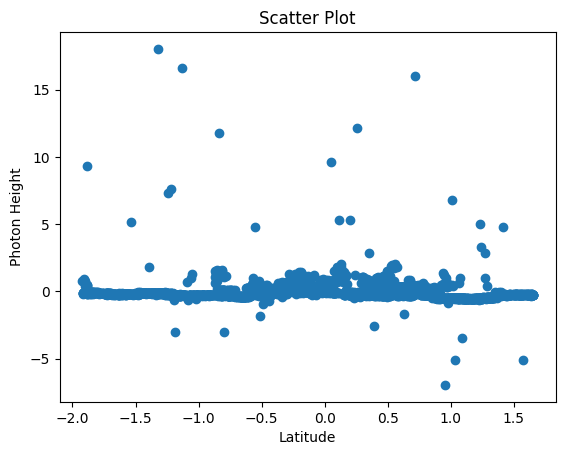

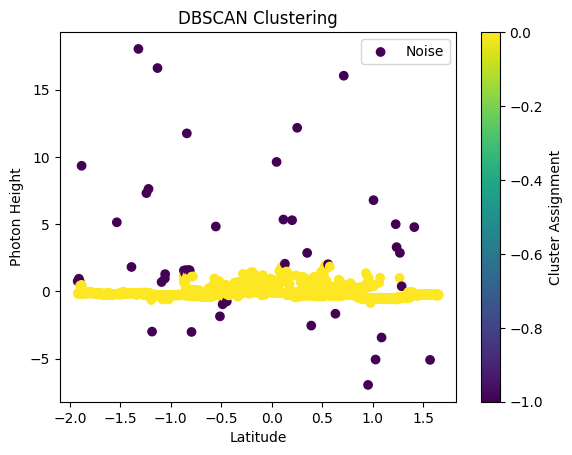

ValueError: ignored

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


from google.colab import drive
drive.mount('/content/drive')

# Specify the path to the CSV file
csv_path = '/content/drive/MyDrive/INTERNSHIP/ICESAT_1.csv'

# Read the dataset from the CSV file
d1 = pd.read_csv(csv_path)

# Select the required columns for analysis
req_col = ["photon height", "latitude"]

# Print the first few rows of the selected columns
print(d1[req_col].head())

# Standardize the features using StandardScaler
z = StandardScaler()
d1[["photon height","latitude"]] = z.fit_transform(d1[["photon height","latitude"]])

# Print the standardized features
print(d1[["photon height","latitude"]].head())

# Create a scatter plot of the data points
plt.scatter(d1["latitude"], d1["photon height"])
plt.ylabel("Photon Height")
plt.xlabel("Latitude")
plt.title("Scatter Plot")
plt.show()

# Perform DBSCAN clustering
db1 = DBSCAN(eps=0.5, min_samples=25).fit(d1)

# Add the 'assignments' column to the DataFrame
d1['assignments'] = db1.labels_

# Create a list of cluster labels for legend
labsList = ["Noise"] + ["Cluster" + str(i) for i in range(1, len(set(db1.labels_)))]

# Create a scatter plot of the data points colored by cluster assignments
plt.scatter(d1["latitude"], d1["photon height"], c=db1.labels_)
plt.ylabel("Photon Height")
plt.xlabel("Latitude")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster Assignment")
plt.legend(labsList)
plt.show()

# Select clustered data points for silhouette score calculation
d1_clustered = d1.loc[(d1.assignments >= 0)]

# Calculate the silhouette score for clustered data points
silhouette_score(d1_clustered[["latitude","photon height"]], d1_clustered[["assignments"]])

# Calculate the overall silhouette score for the dataset
silhouette_score(d1[["latitude","photon height"]],d1[["assignments"]])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   photon height   latitude
0      398.14233  27.228242
1      391.40497  27.228248
2      391.65402  27.228248
3      391.85645  27.228248
4      391.81010  27.228254
   photon height  latitude
0       0.762227 -1.922833
1      -0.178431 -1.919921
2      -0.143659 -1.919919
3      -0.115396 -1.919918
4      -0.121867 -1.916966


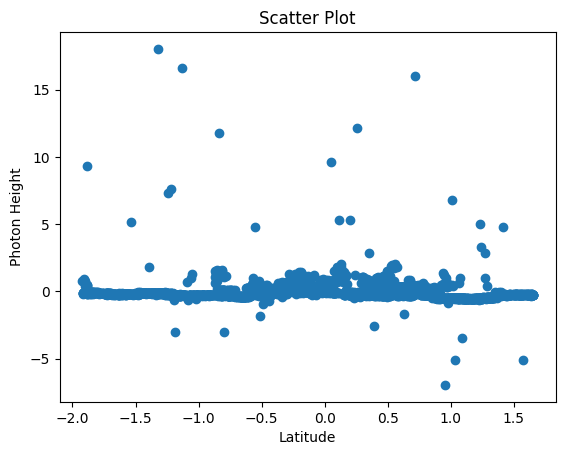

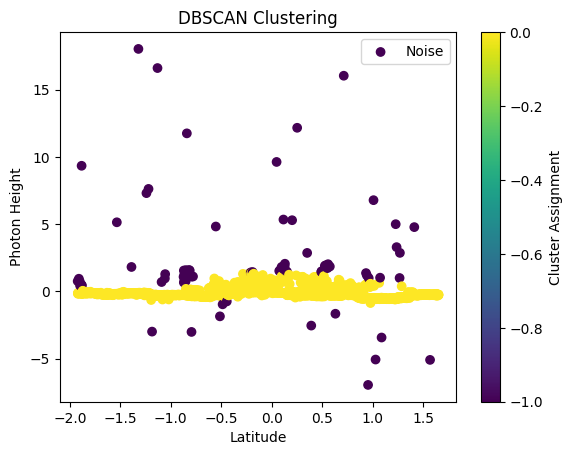

Insufficient number of labels for silhouette score calculation.
Overall Silhouette Score: 0.6025871953248549


In [17]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from google.colab import drive
drive.mount('/content/drive')

# Specify the path to the CSV file
csv_path = '/content/drive/MyDrive/INTERNSHIP/ICESAT_1.csv'

# Read the dataset from the CSV file
d1 = pd.read_csv(csv_path)

# Select the required columns for analysis
req_col = ["photon height", "latitude"]

# Print the first few rows of the selected columns
print(d1[req_col].head())

# Standardize the features using StandardScaler
z = StandardScaler()
d1[["photon height", "latitude"]] = z.fit_transform(d1[["photon height", "latitude"]])

# Print the standardized features
print(d1[["photon height", "latitude"]].head())

# Create a scatter plot of the data points
plt.scatter(d1["latitude"], d1["photon height"])
plt.ylabel("Photon Height")
plt.xlabel("Latitude")
plt.title("Scatter Plot")
plt.show()

# Perform DBSCAN clustering
db1 = DBSCAN(eps=0.3, min_samples=25).fit(d1[req_col])

# Update the labels in the DataFrame
d1["assignments"] = db1.labels_

# Create a list of cluster labels for legend
labsList = ["Noise"] + ["Cluster" + str(i) for i in range(1, len(set(db1.labels_)))]

# Create a scatter plot of the data points colored by cluster assignments
plt.scatter(d1["latitude"], d1["photon height"], c=db1.labels_)
plt.ylabel("Photon Height")
plt.xlabel("Latitude")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster Assignment")
plt.legend(labsList)
plt.show()

# Select clustered data points for silhouette score calculation
d1_clustered = d1.loc[d1["assignments"] >= 0]

# Check if there are at least two unique labels in the clustered data
unique_labels = d1_clustered["assignments"].unique()
if len(unique_labels) < 2:
    print("Insufficient number of labels for silhouette score calculation.")
else:
    # Calculate the silhouette score for clustered data points
    silhouette = silhouette_score(d1_clustered[["latitude", "photon height"]], d1_clustered["assignments"])
    print("Silhouette Score for Clustered Data Points:", silhouette)

# Calculate the overall silhouette score for the dataset
silhouette_overall = silhouette_score(d1[["latitude", "photon height"]], d1["assignments"])
print("Overall Silhouette Score:", silhouette_overall)
